In [1]:
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
categories = ['PNEUMONIA', 'NORMAL'] # Index 0-Pulmão Pneumonico e 1-Pulmão Normal
img_size = 150 # Redimensionando a imagem para 150x150 pixels

def images_manipulation(data_dir):
    data = [] 
    number_of_normal = 0
    number_of_pneumonia = 0

    for category in categories: 
        path = os.path.join(data_dir, category)
        lista = os.listdir(path)

        if category == "NORMAL":
            number_of_normal += len(lista)
        else:
            number_of_pneumonia += len(lista)

        class_num = categories.index(category)
        for img in os.listdir(path):
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_image, class_num])
                
    return np.array(data), number_of_normal, number_of_pneumonia

test_data, number_of_normal_test, number_of_pneumonia_test = images_manipulation('content/chest_xray/test')
train_data, number_of_normal_train, number_of_pneumonia_train = images_manipulation('content/chest_xray/train')

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


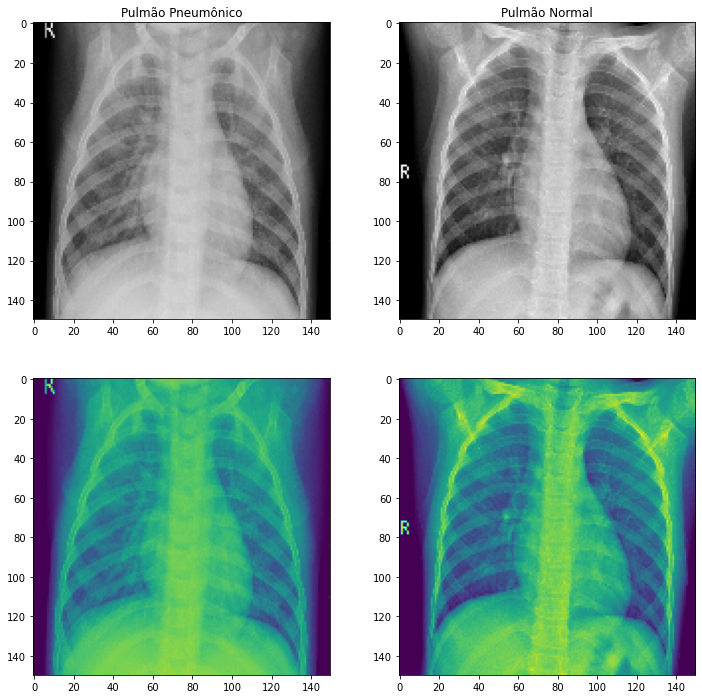

Classificação -> 0 = Pneumonia
Classificação -> 1 = Normal


In [3]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(test_data[200][0], cmap='gray')
plt.title("Pulmão Pneumônico")

plt.subplot(222)
plt.imshow(test_data[-2][0], cmap='gray')
plt.title("Pulmão Normal")

plt.subplot(223)
plt.imshow(test_data[200][0])

plt.subplot(224)
plt.imshow(test_data[-2][0])

plt.show()
print(f"Classificação -> {test_data[200][1]} = Pneumonia")
print(f"Classificação -> {test_data[-2][1]} = Normal")

In [4]:
print(f"Número de Pulmões Normais no Treino: {number_of_normal_train}")
print(f"Número de Pulmões Pneumônicos no Treino: {number_of_pneumonia_train}")
print(f"Número de Pulmões Normais no Teste: {number_of_normal_test}")
print(f"Número de Pulmões Pneumônicos no Teste: {number_of_pneumonia_test}")

Número de Pulmões Normais no Treino: 1341
Número de Pulmões Pneumônicos no Treino: 3875
Número de Pulmões Normais no Teste: 234
Número de Pulmões Pneumônicos no Teste: 390


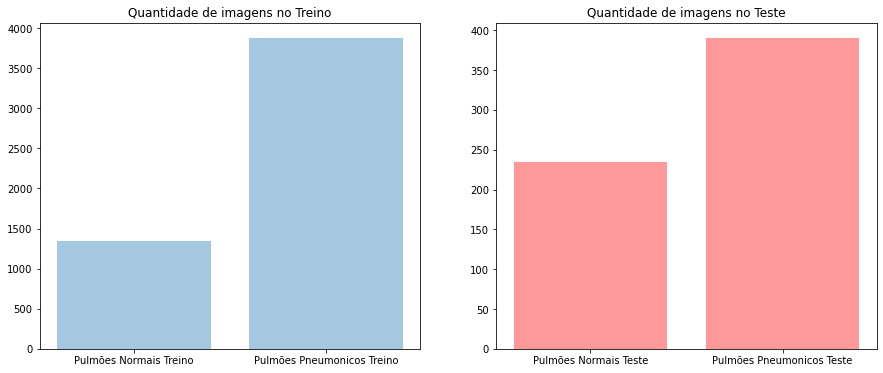

In [5]:
dicionario_barras_treino = {'Pulmões Normais Treino':number_of_normal_train,
                     'Pulmões Pneumonicos Treino':number_of_pneumonia_train}
dicionario_barras_teste = {'Pulmões Normais Teste':number_of_normal_test,
                     'Pulmões Pneumonicos Teste':number_of_pneumonia_test} 
nomes_treino = dicionario_barras_treino.keys()
valores_treino = dicionario_barras_treino.values()

nomes_test = dicionario_barras_teste.keys()
valores_test = dicionario_barras_teste.values()

plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.bar(nomes_treino, valores_treino, alpha=.4) 
plt.title("Quantidade de imagens no Treino")

plt.subplot(122)
plt.bar(nomes_test, valores_test, color="r", alpha=.4) 

plt.title("Quantidade de imagens no Teste")
plt.show()

Visualizando quantidade de pixels por intensidade da cor

In [6]:
quantidade_pixel_intensidade_normal = [0]*256
quantidade_pixel_intensidade_pneumonia = [0]*256

for imagem in test_data:
    if imagem[1] == 0: 
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_pneumonia[pixel] += 1
    else:
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_normal[pixel] += 1

print("Teste Pronto")

for imagem in train_data:
    if imagem[1] == 0: 
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_pneumonia[pixel] += 1
    else:
        for linha in imagem[0]:
            for pixel in linha:
                quantidade_pixel_intensidade_normal[pixel] += 1

print("Treino Pronto")

Teste Pronto
Treino Pronto


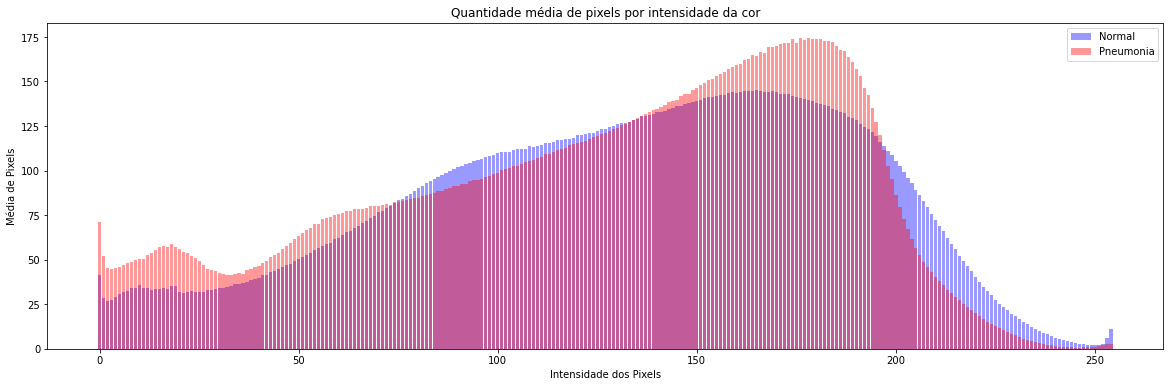

In [7]:
'''Tiramos o elemento 0 da lista, pois ele representa a cor 0 em RGB (preto absoluto),
que aparece diversas vezes nos cantos dos raios X, partes da imagem que por representarem
o fundo, e não o pulmão em si, são irrelevantes para a análise.'''



total_pneumonico = number_of_pneumonia_test + number_of_pneumonia_train
total_normal = number_of_normal_train + number_of_normal_test



plt.figure(figsize=(20,6))
plt.bar(range(255), np.array(quantidade_pixel_intensidade_normal[1:])/total_normal, color="b", alpha=.4, label="Normal")
plt.bar(range(255), np.array(quantidade_pixel_intensidade_pneumonia[1:])/total_pneumonico, color="r", alpha=.4, label="Pneumonia")
plt.title("Quantidade média de pixels por intensidade da cor")
plt.xlabel("Intensidade dos Pixels")
plt.ylabel("Média de Pixels")
plt.legend()
plt.show()

Visualizando um "Pulmão-médio" de cada classificação

In [8]:
dados = pd.DataFrame(np.append(test_data, train_data, axis=0))

dados = dados.rename( columns = {0:'imagem', 1:'classificacao'})
dados.classificacao = dados.classificacao.astype("category")
dados.classificacao.cat.categories = (["pneumonia", "normal"])


pneumonia = dados.loc[dados["classificacao"] == "pneumonia", "imagem"]
normal = dados.loc[dados["classificacao"] == "normal", "imagem"]

pneumonia_media = np.array(pneumonia.tolist())
normal_media = np.array(normal.tolist())

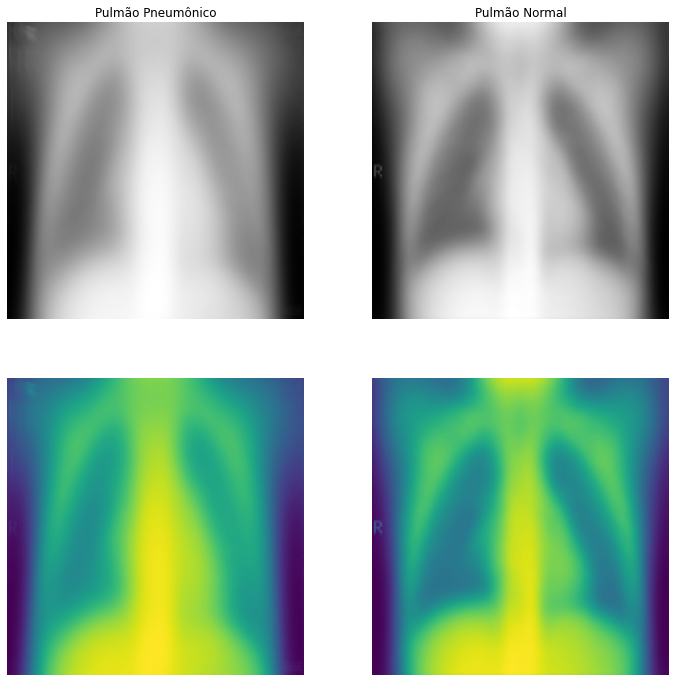

In [9]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.imshow(pneumonia_media.mean(axis=0), cmap="gray")
plt.title("Pulmão Pneumônico")
plt.axis('off')

plt.subplot(222)
plt.imshow(normal_media.mean(axis=0), cmap="gray")
plt.title("Pulmão Normal")
plt.axis('off')

plt.subplot(223)
plt.imshow(pneumonia_media.mean(axis=0))
plt.axis('off')

plt.subplot(224)
plt.imshow(normal_media.mean(axis=0))
plt.axis('off')

plt.show()

Logistic Regression

In [11]:
img_size = 75
test_data, number_of_normal_test, number_of_pneumonia_test = images_manipulation('content/chest_xray/test')
train_data, number_of_normal_train, number_of_pneumonia_train = images_manipulation('content/chest_xray/train')

np.random.shuffle(train_data)
np.random.shuffle(test_data)
X_train = train_data[:, 0]
X_test = test_data[:, 0]

X_train = [(img.flatten()/255.) for img in X_train]
y_train = train_data[:, 1].reshape(-1, 1)

X_test = [img.flatten()/255. for img in X_test]
y_test = test_data[:, 1].reshape(-1, 1)

dados_train = pd.DataFrame(X_train)
dados_train["Label"] = y_train

dados_test = pd.DataFrame(X_test)
dados_test["Label"] = y_test

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [12]:
logistic = LogisticRegression(max_iter=1000)
logistic.fit(dados_train.drop("Label", axis=1).values, dados_train.Label.astype(float))

LogisticRegression(max_iter=1000)

In [13]:
prediction = logistic.predict(dados_test.drop("Label", axis=1).values)
pontuacao = logistic.score(dados_test.drop("Label", axis=1).values, dados_test.Label.astype(float))
print(f"A pontuação do Modelo Logístico na Base de Testes foi: {pontuacao*100:.2f}%")

A pontuação do Modelo Logístico na Base de Testes foi: 74.68%


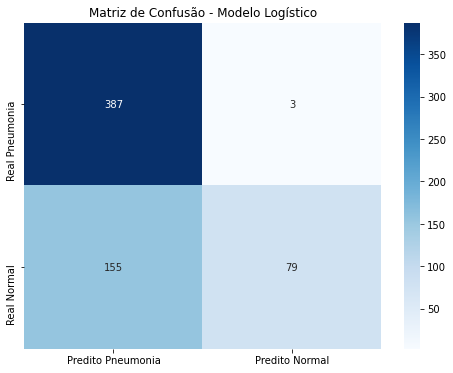

In [14]:
plt.figure(figsize=(8, 6))
plt.title("Matriz de Confusão - Modelo Logístico")
sns.heatmap(confusion_matrix(dados_test.Label.astype(float), prediction),
            cmap="Blues",
            xticklabels=["Predito Pneumonia", "Predito Normal"],
            yticklabels=["Real Pneumonia", "Real Normal"],
            annot=True,
            fmt='g');

In [15]:
print(f"Sensibilidade: {387*100/390:.2f}%")
print(f"Especificidade: {79*100/234:.2f}%")
print(f"Acurácia: {pontuacao*100:.2f}%")

Sensibilidade: 99.23%
Especificidade: 33.76%
Acurácia: 74.68%


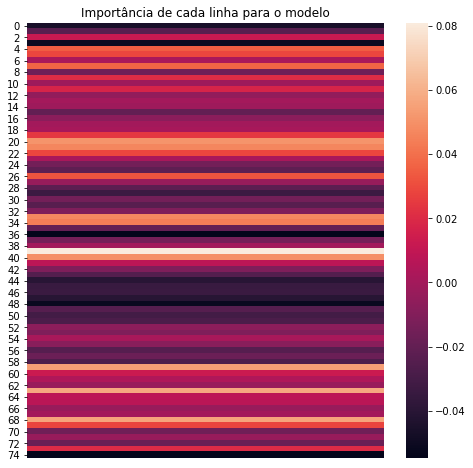

In [16]:
plt.figure(figsize=(8, 8))
plt.title("Importância de cada linha para o modelo")
sns.heatmap(logistic.coef_.reshape(75, 75).mean(axis=0).reshape(75, -1), xticklabels=False);

In [17]:
base_dir = 'content/chest_xray'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'test')

# Adicionando Aumento de Dados para o ImageGenerator (a fim de evitar overfitting)
train_datagen = ImageDataGenerator(
    rotation_range = 30,  # Rotacionar a imagem até 30 graus de maneira aleatória
    zoom_range = 0.2, # Dando zoom na imagem de maneira aleatória
    width_shift_range=0.1,  # Deslocando a imagem horizontalmente de maneira aleatória
    height_shift_range=0.1,  # Deslocando a imagem verticalmente de maneira aleatória
    horizontal_flip = True,  # Espelhamento horizontal da imagem de maneira aleatória
    rescale = 1.0/255.)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150),
                                                    color_mode="grayscale")

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size  = 20,
                                                         class_mode  = 'binary', 
                                                         target_size = (150, 150),
                                                         color_mode="grayscale")

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [22]:
model = tf.keras.models.Sequential([
    # Rede Neural Convolucional
    # Camada 1
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Camada 2
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Camada 3
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    # Camada 4
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Rede Neural Densa
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)      

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss="binary_crossentropy",
              metrics=['accuracy'])

# Criando Callback para parar o modelo caso ele atinja 95% de acurácia
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.95):
            print("\nAlcançado acurácia de 95% na base de testes")
            self.model.stop_training = True

callbacks = myCallback()

In [ ]:
history = model.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 30,
    callbacks=[callbacks])

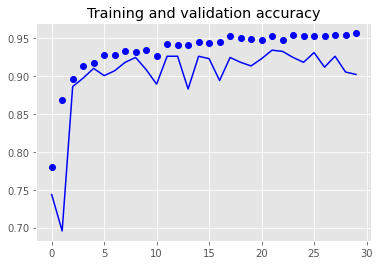

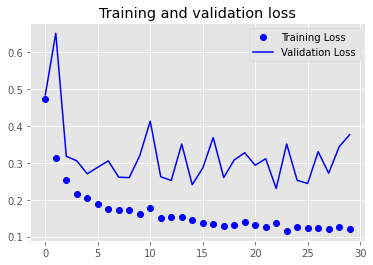

In [ ]:
plt.style.use('ggplot')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(validation_generator)